In [1]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("MLTempDataset.csv")
df

,Unnamed: 0,Datetime1,DAYTON_MW,Datetime
0,0,0,20.867,2022-01-04 00:00:00
1,1,1,21.000,2022-01-04 01:00:00
2,2,2,20.867,2022-01-04 02:00:00
3,3,3,20.650,2022-01-04 03:00:00
4,4,4,20.400,2022-01-04 04:00:00
...,...,...,...,...
6671,6671,19,27.350,2022-10-08 23:00:00
6672,6672,20,26.800,2022-10-09 00:00:00
6673,6673,21,26.450,2022-10-09 01:00:00
6674,6674,22,25.900,2022-10-09 02:00:00


In [3]:
df.drop(["Unnamed: 0","Datetime1"], axis=1, inplace=True)

In [4]:
df.head()

,DAYTON_MW,Datetime
0,20.867,2022-01-04 00:00:00
1,21.000,2022-01-04 01:00:00
2,20.867,2022-01-04 02:00:00
3,20.650,2022-01-04 03:00:00
4,20.400,2022-01-04 04:00:00


In [5]:
df[['Date', 'Time']] = df['Datetime'].str.split(' ', expand=True)
df[['Year', 'Month', 'Day']] = df['Date'].str.split('-', expand=True)
df[['Hour', 'Minute', 'Second']] = df['Time'].str.split(':', expand=True)
df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']] = df[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']].apply(pd.to_numeric)
df.drop(columns=['Datetime', 'Date', 'Time'], inplace=True)

In [6]:
df.head()

,DAYTON_MW,Year,Month,Day,Hour,Minute,Second
0,20.867,2022,1,4,0,0,0
1,21.000,2022,1,4,1,0,0
2,20.867,2022,1,4,2,0,0
3,20.650,2022,1,4,3,0,0
4,20.400,2022,1,4,4,0,0


In [7]:
df.head()

,DAYTON_MW,Year,Month,Day,Hour,Minute,Second
0,20.867,2022,1,4,0,0,0
1,21.000,2022,1,4,1,0,0
2,20.867,2022,1,4,2,0,0
3,20.650,2022,1,4,3,0,0
4,20.400,2022,1,4,4,0,0


In [8]:
df=df[df['Year'] == 2022]

In [9]:
df.drop("Year",axis=1,inplace=True)

In [10]:
df

,DAYTON_MW,Month,Day,Hour,Minute,Second
0,20.867,1,4,0,0,0
1,21.000,1,4,1,0,0
2,20.867,1,4,2,0,0
3,20.650,1,4,3,0,0
4,20.400,1,4,4,0,0
...,...,...,...,...,...,...
6671,27.350,10,8,23,0,0
6672,26.800,10,9,0,0,0
6673,26.450,10,9,1,0,0
6674,25.900,10,9,2,0,0


In [11]:
df.rename(columns={'DAYTON_MW': 'Temp'}, inplace=True)

In [12]:
df.head()

,Temp,Month,Day,Hour,Minute,Second
0,20.867,1,4,0,0,0
1,21.000,1,4,1,0,0
2,20.867,1,4,2,0,0
3,20.650,1,4,3,0,0
4,20.400,1,4,4,0,0


In [13]:
visualday = df[(df["Day"] == 4) & (df["Month"] == 1)]

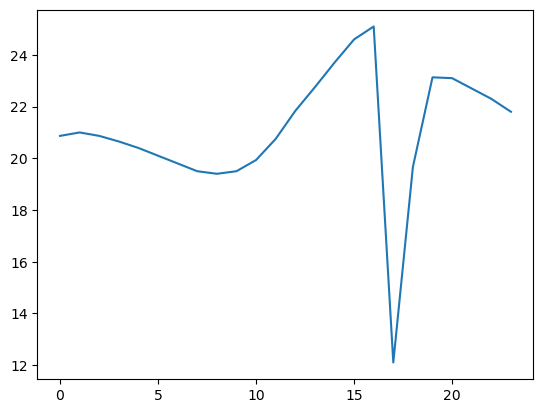

In [14]:
plt.plot(visualday["Hour"],visualday["Temp"])

In [15]:
x = df.drop("Temp", axis=1)

In [16]:
y=df["Temp"]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1)

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
Linear= LinearRegression()

In [20]:
Linear.fit(X_train,y_train)

LinearRegression()

In [21]:
Linear.score(X_test,y_test)*100

3.204556499868172

Text(0.5, 1.0, 'Model predictions based on linear regression')

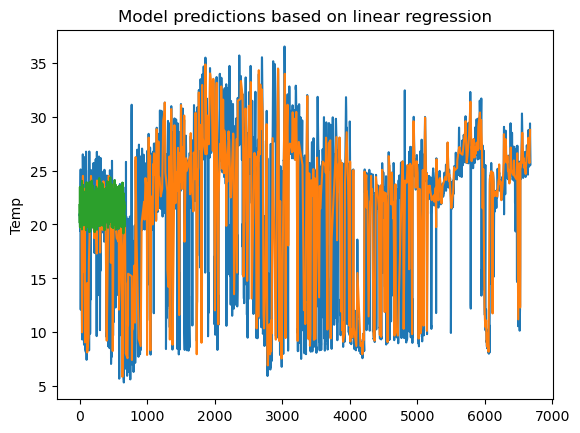

In [22]:
pred=Linear.predict(X_test)
sns.lineplot(y_train)
sns.lineplot(y_test)
sns.lineplot(pred)
plt.title('Model predictions based on linear regression')

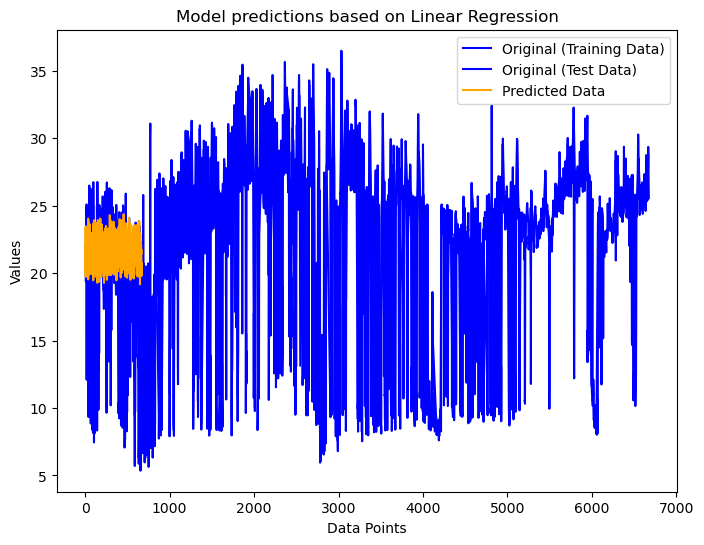

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.lineplot(data=y_train, color='blue', label='Original (Training Data)')
sns.lineplot(data=y_test, color='blue', label='Original (Test Data)')
sns.lineplot(data=pred, color='orange', label='Predicted Data')
plt.title('Model predictions based on Linear Regression')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
Random=RandomForestRegressor()

In [26]:
Random.fit(X_train,y_train)

RandomForestRegressor()

In [27]:
Random.score(X_test,y_test)*100

83.82424128288079

In [28]:
predictions=Random.predict(X_test)

In [29]:
for i in range(len(X_test)):
    print("Test Data: {} ---> Predicts: {}".format(X_test.iloc[i], predictions[i]))

Test Data: Month      4
Day       29
Hour      18
Minute     0
Second     0
Name: 2778, dtype: int64 ---> Predicts: 9.740579999999996
Test Data: Month      6
Day       26
Hour       7
Minute     0
Second     0
Name: 4159, dtype: int64 ---> Predicts: 8.78770000000001
Test Data: Month      7
Day       17
Hour       1
Minute     0
Second     0
Name: 4657, dtype: int64 ---> Predicts: 12.564490000000013
Test Data: Month      1
Day       30
Hour      10
Minute     0
Second     0
Name: 634, dtype: int64 ---> Predicts: 6.875249999999999
Test Data: Month      2
Day       17
Hour       8
Minute     0
Second     0
Name: 1064, dtype: int64 ---> Predicts: 22.20130000000001
Test Data: Month      9
Day       19
Hour      19
Minute     0
Second     0
Name: 6211, dtype: int64 ---> Predicts: 24.60366000000002
Test Data: Month      2
Day       17
Hour       1
Minute     0
Second     0
Name: 1057, dtype: int64 ---> Predicts: 21.94287
Test Data: Month     9
Day       2
Hour      2
Minute    0
Second    0
N

In [30]:
new_test=X_test.reset_index(drop=True)
new_test.index.name = 'Index'
new_test.head()

,Month,Day,Hour,Minute,Second
Index,,,,,
0,4,29,18,0,0
1,6,26,7,0,0
2,7,17,1,0,0
3,1,30,10,0,0
4,2,17,8,0,0


In [31]:
original_test=y_test.reset_index(drop=True)
original_test.index.name = 'Index'
original_test.head()

Index
0     8.967
1     8.733
2    15.850
3     5.867
4    22.075
Name: Temp, dtype: float64

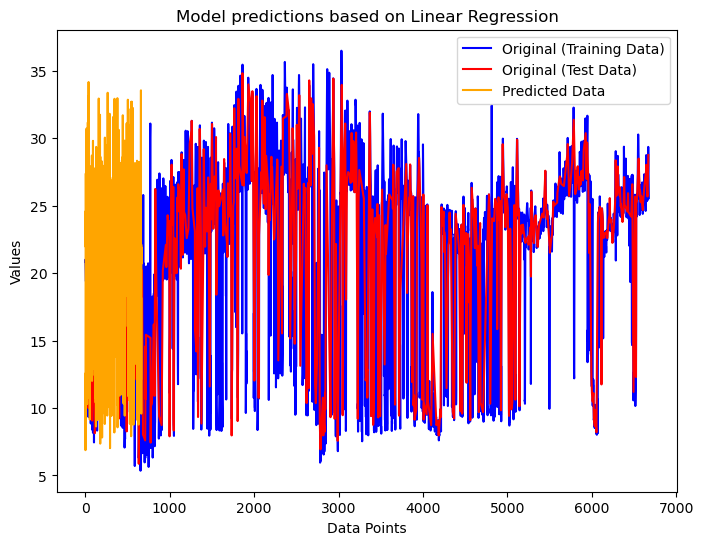

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.lineplot(data=y_train, color='blue', label='Original (Training Data)')
sns.lineplot(data=y_test, color='red', label='Original (Test Data)')
sns.lineplot(data=predictions, color='orange', label='Predicted Data')
plt.title('Model predictions based on Linear Regression')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()


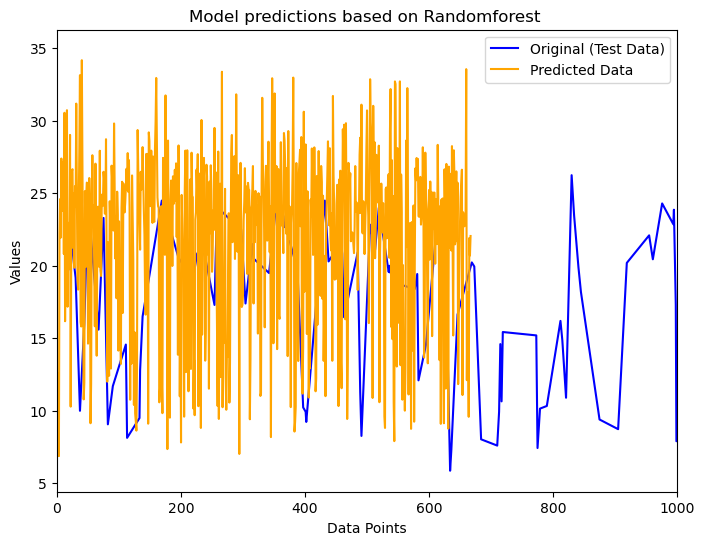

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
#sns.lineplot(data=y_train[:1000], color='blue', label='Original (Training Data)')
sns.lineplot(data=y_test[:1000], color='blue', label='Original (Test Data)')
sns.lineplot(data=predictions[:1000], color='orange', label='Predicted Data')

plt.title('Model predictions based on Randomforest ')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.xlim(0, 1000)

plt.show()


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
Decision=DecisionTreeRegressor()

In [36]:
Decision.fit(X_train,y_train)

DecisionTreeRegressor()

In [37]:
Decision.score(X_test,y_test)*100

79.36945197799541